In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ste import STE
import matplotlib.pyplot as plt
from itertools import permutations

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time-series dataset

In [4]:
# Define the country name.
COUNTRY = "Yemen"

In [5]:
# Load the time-series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}-day.csv", header = [0, 1], index_col = 0)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata                         Abyan                                      \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) Code   
Datetime                                                                        
2018-08-22                      90.454758                     111.487446   78   
2018-08-23                      89.927580                     110.382403   78   
2018-08-24                      89.436780                     109.316308   78   
2018-08-25                      88.982357                     108.289161   78   
2018-08-26                      88.564312                     107.300961   78   

AdminStrata                                                                    \
Indicator   Exchange rate      FCG Fatalities        Lat        Lon      NDVI   
Datetime                                                                        
2018-08-22       0.207215  31.8098       10.0  13.704878  46.158142  0.098889   
2018-08-23       0.210332  32.3747       10.0  13.704878  46.158142  0.098958   
2018-08-24       0.213449  33.7721       10.0  13.704878  46.158142  0.099033   
2018-08-25       0.216565  34.5337       10.0  13.704878  46.158142  0.099113   
2018-08-26       0.219682  32.3279       10.0  13.704878  46.158142  0.099197   

AdminStrata               ...      Taizz                                  \
Indicator   NDVI Anomaly  ... Fatalities        Lat        Lon      NDVI   
Datetime                  ...                                              
2018-08-22     98.450151  ...      171.0  13.416517  43.778161  0.198394   
2018-08-23     98.353086  ...      147.0  13.416517  43.778161  0.198516   
2018-08-24     98.254291  ...      145.0  13.416517  43.778161  0.198655   
2018-08-25     98.153766  ...      156.0  13.416517  43.778161  0.198812   
2018-08-26     98.051510  ...      164.0  13.416517  43.778161  0.198987   

AdminStrata                                                                  \
Indicator   NDVI Anomaly Population Price cereals and tubers Rainfalls (mm)   
Datetime                                                                      
2018-08-22    104.340193    3065034                 0.181576        41.6606   
2018-08-23    104.184601    3065034                 0.181735        42.6437   
2018-08-24    104.021750    3065034                 0.181894        43.6268   
2018-08-25    103.851638    3065034                 0.182052        44.6099   
2018-08-26    103.674267    3065034                 0.182211        45.5930   

AdminStrata                   
Indicator   Ramadan     rCSI  
Datetime                      
2018-08-22      0.0  50.9190  
2018-08-23      0.0  50.4159  
2018-08-24      0.0  49.3913  
2018-08-25      0.0  50.3024  
2018-08-26      0.0  50.2930  

[5 rows x 300 columns]

In [6]:
df.columns.get_level_values("Indicator").unique()

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'Code', 'Exchange rate', 'FCG', 'Fatalities', 'Lat', 'Lon', 'NDVI',
       'NDVI Anomaly', 'Population', 'Price cereals and tubers',
       'Rainfalls (mm)', 'Ramadan', 'rCSI'],
      dtype='object', name='Indicator')

In [7]:
df.drop(["Code", "Lat", "Lon", "Ramadan", "Population"], axis = 1, level = "Indicator", inplace = True)
df.head()

AdminStrata                         Abyan                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-08-22                      90.454758                     111.487446   
2018-08-23                      89.927580                     110.382403   
2018-08-24                      89.436780                     109.316308   
2018-08-25                      88.982357                     108.289161   
2018-08-26                      88.564312                     107.300961   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2018-08-22       0.207215  31.8098       10.0  0.098889    98.450151   
2018-08-23       0.210332  32.3747       10.0  0.098958    98.353086   
2018-08-24       0.213449  33.7721       10.0  0.099033    98.254291   
2018-08-25       0.216565  34.5337       10.0  0.099113    98.153766   
2018-08-26       0.219682  32.3279       10.0  0.099197    98.051510   

AdminStrata                                                   ...  \
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  ...   
Datetime                                                      ...   
2018-08-22                  0.164924        12.9544  37.4219  ...   
2018-08-23                  0.166085        13.0949  37.3462  ...   
2018-08-24                  0.167246        13.2354  37.9994  ...   
2018-08-25                  0.168407        13.3759  36.0682  ...   
2018-08-26                  0.169568        13.5164  38.2185  ...   

AdminStrata                         Taizz                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2018-08-22                      93.865658                     147.652361   
2018-08-23                      94.296436                     145.973629   
2018-08-24                      94.778817                     144.313356   
2018-08-25                      95.312802                     142.671542   
2018-08-26                      95.898390                     141.048187   

AdminStrata                                                           \
Indicator   Exchange rate      FCG Fatalities      NDVI NDVI Anomaly   
Datetime                                                               
2018-08-22       0.207371  39.0431      171.0  0.198394   104.340193   
2018-08-23       0.210846  39.3717      147.0  0.198516   104.184601   
2018-08-24       0.214321  36.6621      145.0  0.198655   104.021750   
2018-08-25       0.217796  37.2052      156.0  0.198812   103.851638   
2018-08-26       0.221272  37.0257      164.0  0.198987   103.674267   

AdminStrata                                                   
Indicator   Price cereals and tubers Rainfalls (mm)     rCSI  
Datetime                                                      
2018-08-22                  0.181576        41.6606  50.9190  
2018-08-23                  0.181735        42.6437  50.4159  
2018-08-24                  0.181894        43.6268  49.3913  
2018-08-25                  0.182052        44.6099  50.3024  
2018-08-26                  0.182211        45.5930  50.2930  

[5 rows x 200 columns]

In [8]:
len(df)

863

In [9]:
PROVINCES = df.columns.get_level_values(0).unique()
PROVINCES

Index(['Abyan', 'Aden', 'Al Bayda', 'Al Dhale'e', 'Al Hudaydah', 'Al Jawf',
       'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar',
       'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah', 'Sa'ada', 'Sana'a',
       'Shabwah', 'Taizz'],
      dtype='object', name='AdminStrata')

In [10]:
#TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

In [11]:
def to_symbolization(X, m = 3):
    """
    Convert scalar time-series into a symbolic representation using an embedding dimension m.
    
    """
    # Compute the symbolization of the two time-series rolling a window of dimension m.
    patterns = list(permutations(np.arange(m) + 1))
    # Get the list of integer numbers associated to the permutation.
    dict_pattern_index = {patterns[i]: i for i in range(len(patterns))}
    
    # Pattern time-series X.
    X = np.argsort(rolling_window(X, m).T) + 1
    X_symb = np.array([dict_pattern_index[tuple(x)] for x in X])

    return X_symb

def rolling_window(x, window):
    """
    This function allows to rolling a window over a numpy array.

    Parameters
    ----------
    x: the input array.
    window: the length of the window to slide.

    """
    x = np.array(x)
    # Set shape.
    shape = list(x.shape)
    shape[0] = x.shape[0] - window + 1
    shape.insert(len(shape)-1, window)
    # Set strides.
    strides = list(x.strides)
    strides.insert(0, strides[0])
    return np.lib.stride_tricks.as_strided(x, shape = tuple(shape), strides = tuple(strides))

In [12]:
# Convert to symbolic representation.
df_symb = df.apply(lambda x: to_symbolization(x, m = 3))
df_symb.head()

AdminStrata                         Abyan                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                       5                              5   
1                                       5                              5   
2                                       5                              5   
3                                       5                              5   
4                                       5                              5   

AdminStrata                                                 \
Indicator   Exchange rate FCG Fatalities NDVI NDVI Anomaly   
0                       0   0          0    0            5   
1                       0   0          0    0            5   
2                       0   4          0    0            5   
3                       0   3          0    0            5   
4                       0   0          0    0            5   

AdminStrata                                               ...  \
Indicator   Price cereals and tubers Rainfalls (mm) rCSI  ...   
0                                  0              0    2  ...   
1                                  0              0    4  ...   
2                                  0              0    2  ...   
3                                  0              0    0  ...   
4                                  0              0    0  ...   

AdminStrata                         Taizz                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                       0                              5   
1                                       0                              5   
2                                       0                              5   
3                                       0                              5   
4                                       0                              5   

AdminStrata                                                 \
Indicator   Exchange rate FCG Fatalities NDVI NDVI Anomaly   
0                       0   4          5    0            5   
1                       0   3          2    0            5   
2                       0   1          0    0            5   
3                       0   5          0    0            5   
4                       0   3          0    0            5   

AdminStrata                                               
Indicator   Price cereals and tubers Rainfalls (mm) rCSI  
0                                  0              0    5  
1                                  0              0    3  
2                                  0              0    1  
3                                  0              0    2  
4                                  0              0    4  

[5 rows x 200 columns]

In [13]:
# Select only the exogenous indicators.
df_no_fcs = df_symb.drop(columns = ["FCG"], axis = 1, level = 1)
df_no_fcs.head()

AdminStrata                         Abyan                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                       5                              5   
1                                       5                              5   
2                                       5                              5   
3                                       5                              5   
4                                       5                              5   

AdminStrata                                             \
Indicator   Exchange rate Fatalities NDVI NDVI Anomaly   
0                       0          0    0            5   
1                       0          0    0            5   
2                       0          0    0            5   
3                       0          0    0            5   
4                       0          0    0            5   

AdminStrata                                               \
Indicator   Price cereals and tubers Rainfalls (mm) rCSI   
0                                  0              0    2   
1                                  0              0    4   
2                                  0              0    2   
3                                  0              0    0   
4                                  0              0    0   

AdminStrata                          Aden  ... Shabwah  \
Indicator   1 Month Anomaly Rainfalls (%)  ...    rCSI   
0                                       5  ...       1   
1                                       5  ...       5   
2                                       5  ...       2   
3                                       5  ...       1   
4                                       5  ...       2   

AdminStrata                         Taizz                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                       0                              5   
1                                       0                              5   
2                                       0                              5   
3                                       0                              5   
4                                       0                              5   

AdminStrata                                             \
Indicator   Exchange rate Fatalities NDVI NDVI Anomaly   
0                       0          5    0            5   
1                       0          2    0            5   
2                       0          0    0            5   
3                       0          0    0            5   
4                       0          0    0            5   

AdminStrata                                               
Indicator   Price cereals and tubers Rainfalls (mm) rCSI  
0                                  0              0    5  
1                                  0              0    3  
2                                  0              0    1  
3                                  0              0    2  
4                                  0              0    4  

[5 rows x 180 columns]

In [14]:
PREDICTORS = df_no_fcs.columns.get_level_values(1).unique()
PREDICTORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'Exchange rate', 'Fatalities', 'NDVI', 'NDVI Anomaly',
       'Price cereals and tubers', 'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [15]:
# Assign a color to each indicator.
cols = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
        (1.0, 0.4980392156862745, 0.054901960784313725),
        (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
        (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
        (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
        (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
        (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
        (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), 
        (1.0, 1.0, 0.2), 
        (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

colors = dict()
for i,indicator in enumerate(reversed(PREDICTORS)):
    colors[indicator] = cols[i]

In [16]:
delay = 15

## Compute the STE

In [17]:
def history_length(serie):
    adminstrata = serie.name[0]
    indicator = serie.name[1]
    ys = list()
    for k in range(delay):
        x = serie.values.copy()
        y = df_symb[adminstrata]["FCG"].values.copy()
        result = STE.calc_te(x, y, h = k+1) 
        ys.append(result)        
    return pd.Series(ys) 

tqdm.pandas()
df_results_1 = df_no_fcs.progress_apply(history_length)
df_results_1.head()

AdminStrata                         Abyan                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                0.035026                       0.032944   
1                                0.062472                       0.071425   
2                                0.056852                       0.065696   
3                                0.064646                       0.078302   
4                                0.074174                       0.065746   

AdminStrata                                                  \
Indicator   Exchange rate Fatalities      NDVI NDVI Anomaly   
0                0.021406   0.053590  0.025009     0.020289   
1                0.036926   0.105303  0.036253     0.046281   
2                0.050908   0.115776  0.041343     0.047841   
3                0.052443   0.119370  0.042868     0.046487   
4                0.050891   0.129351  0.032317     0.032961   

AdminStrata                                                    \
Indicator   Price cereals and tubers Rainfalls (mm)      rCSI   
0                           0.023864       0.035829  0.061994   
1                           0.057863       0.072667  0.125753   
2                           0.058712       0.089125  0.148586   
3                           0.062435       0.078533  0.127472   
4                           0.065563       0.071923  0.131714   

AdminStrata                          Aden  ...   Shabwah  \
Indicator   1 Month Anomaly Rainfalls (%)  ...      rCSI   
0                                0.028786  ...  0.047088   
1                                0.071441  ...  0.143722   
2                                0.064230  ...  0.106222   
3                                0.061923  ...  0.154910   
4                                0.062639  ...  0.124069   

AdminStrata                         Taizz                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
0                                0.033156                       0.037873   
1                                0.073486                       0.078547   
2                                0.061374                       0.071987   
3                                0.052013                       0.060571   
4                                0.063008                       0.072118   

AdminStrata                                                  \
Indicator   Exchange rate Fatalities      NDVI NDVI Anomaly   
0                0.024812   0.033071  0.025851     0.029835   
1                0.050841   0.111458  0.038093     0.054849   
2                0.054955   0.152530  0.043454     0.051576   
3                0.056368   0.141497  0.040986     0.060716   
4                0.055808   0.157574  0.046765     0.056011   

AdminStrata                                                    
Indicator   Price cereals and tubers Rainfalls (mm)      rCSI  
0                           0.037584       0.039035  0.058958  
1                           0.081932       0.095814  0.124980  
2                           0.075939       0.092823  0.117798  
3                           0.067414       0.101642  0.130080  
4                           0.071076       0.099699  0.133747  

[5 rows x 180 columns]

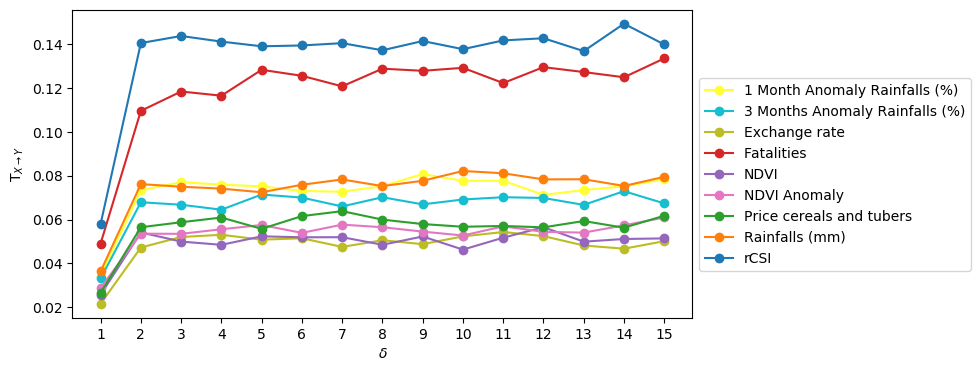

In [18]:
# Define the subplot figure.
fig, axs = plt.subplots(figsize = (8, 4))
for i,indicator in enumerate(df_results_1.columns.get_level_values(1).unique()):
    subdf = df_results_1.xs(indicator, axis = 1, level = 1, drop_level = False)
    subdf.index = subdf.index + 1
    value_statistic = subdf.agg([lambda x: x.quantile(0.25), np.median, lambda x: x.quantile(0.75)], axis = 1)
    value_statistic.columns = ["lower_quantile", "median", "upper_quantile"]
    # Plot.
    value_statistic["median"].plot(style = ".-", label = indicator, ax = axs, ms = 12, c = colors[indicator])
    # Set attributes of the plot.
    axs.legend(loc = "best", bbox_to_anchor = [1., 0.8])
    axs.set_xlabel("$\delta$")
    axs.set_ylabel(r'T$_{X \rightarrow Y}$')
    axs.set_xticks(np.arange(1, delay+1))

# Save the figure.
fig.savefig(f"./output_images/Lags1_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [19]:
T_fcs = df_results_1.max().unstack()

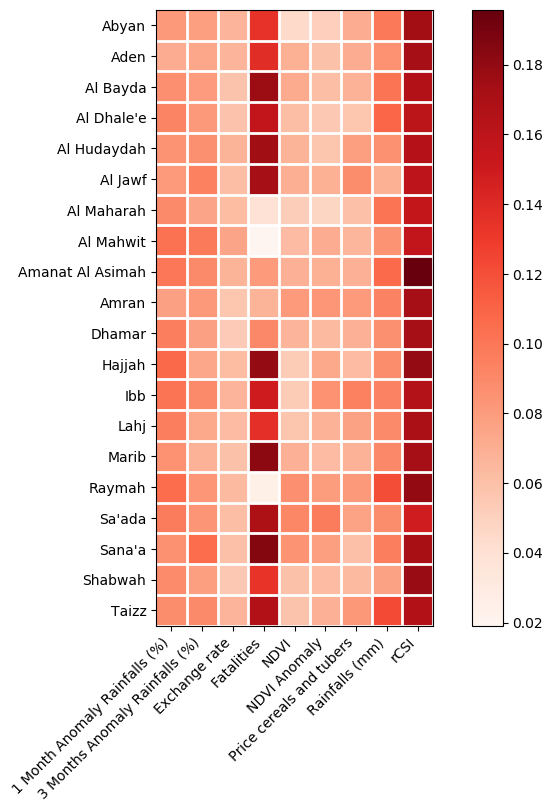

In [20]:
fig, ax = plt.subplots(figsize = (10, 8))
im = ax.imshow(T_fcs.astype(float), cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
#clb = plt.colorbar()
#cbar.set_label("STE", rotation = 270)

ax.set_xticks(range(len(T_fcs.columns)))
ax.set_yticks(range(len(T_fcs.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output_images/Importance1_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [21]:
T_fcs_rank = T_fcs.transpose().rank(method = "max", ascending = False).transpose()
T_fcs_rank.head()

Indicator,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Exchange rate,Fatalities,NDVI,NDVI Anomaly,Price cereals and tubers,Rainfalls (mm),rCSI
AdminStrata,,,,,,,,,
Abyan,4.0,5.0,7.0,2.0,9.0,8.0,6.0,3.0,1.0
Aden,5.0,4.0,8.0,2.0,7.0,9.0,6.0,3.0,1.0
Al Bayda,4.0,5.0,9.0,1.0,6.0,8.0,7.0,3.0,2.0
Al Dhale'e,4.0,5.0,7.0,2.0,6.0,9.0,8.0,3.0,1.0
Al Hudaydah,5.0,3.0,7.0,1.0,8.0,9.0,6.0,4.0,2.0


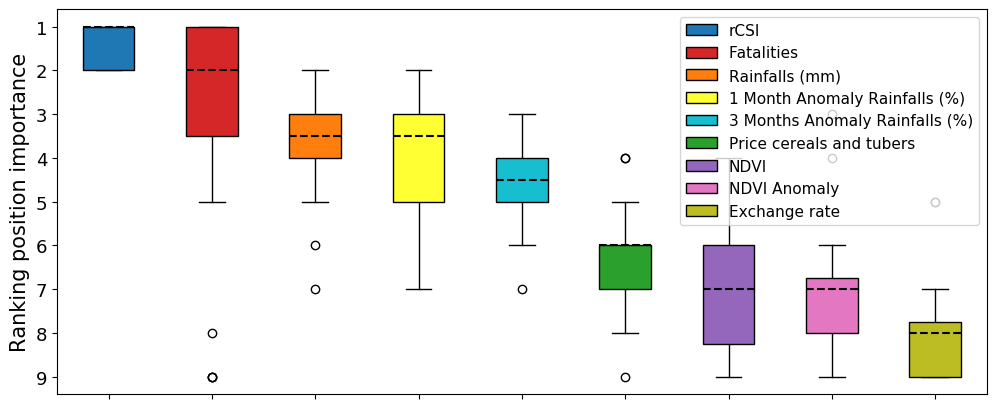

In [22]:
fig, ax = plt.subplots(figsize = (12, 5))
T_fcs_rank = T_fcs_rank.astype(int)
meds = T_fcs_rank.mean()
meds.sort_values(ascending = True, inplace = True)
T_fcs_rank_sort = T_fcs_rank[meds.index]

bplot = ax.boxplot(T_fcs_rank_sort.T, patch_artist = True, medianprops = {"linestyle": "--", "linewidth": 1.5, "color": "black"}) 
# Fill with colors.
legends = list()
for patch, indicator in zip(bplot["boxes"], T_fcs_rank_sort.columns):
    patch.set_facecolor(colors[indicator])
    patch.set_label(indicator)
    legends.append(patch)

ax.invert_yaxis()
#ax.set_xlabel("Indicator")
ax.set_ylabel("Ranking position importance", fontsize = 15)
ax.tick_params(labelsize = 13)
ax.set_xticklabels([""]*len(T_fcs_rank_sort.columns), rotation = 0, fontsize = 15)  

ax.legend(legends, T_fcs_rank_sort.columns, loc = "upper right", prop = {"size": 11})

# Save the figure.
fig.savefig(f"./output_images/Ranking_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

## Compute effective STE

In [ ]:
examples = list()
shuffle_results = dict()

def history_length_eff(serie):
    adminstrata = serie.name[0]
    indicator = serie.name[1]
    ys = list()
    ys_shuffle = list()
    for k in range(delay):
        x = serie.values.copy()
        if adminstrata is "Abyan" and indicator is "NDVI":
            examples.append(x)
        y = df[adminstrata]["FCG"].values.copy()
        result = STE.calc_ste(x, y, m = 3, h = k+1) 
        shuffle = list()
        for i in range(50):
            np.random.shuffle(x)
            if adminstrata is "Abyan" and indicator is "NDVI" and i == 25:
                examples.append(x)
            shuffle.append(STE.calc_ste(x, y, m = 3, h = k+1))  
            shuffle_results[(adminstrata, indicator, k+1, i+1)] = np.std(shuffle)
        shuffle = np.mean(shuffle)
        ys.append(result) 
        ys_shuffle.append(shuffle)
        
    ys = pd.Series(ys, index = pd.MultiIndex.from_product([["original"], np.arange(1, delay+1)], names = ["Type", "Delay"])) 
    ys_shuffle = pd.Series(ys_shuffle, index = pd.MultiIndex.from_product([["shuffle"], np.arange(1, delay+1)], names = ["Type", "Delay"])) 

    return pd.concat([ys, ys_shuffle])

tqdm.pandas()
df_results_2 = df.drop("FCG", axis = 1, level = 1).progress_apply(history_length_eff)
df_results_2.head()

In [ ]:
df_results_2.to_csv("shuffle.csv")

In [ ]:
# Mean among provinces.
shuffling = pd.Series(shuffle_results).unstack(0).mean(axis = 1)

for k in range(delay):
    fig, axs = plt.subplots(figsize = (8, 4))
    for indicator in shuffling.index.get_level_values(0).unique():
        shuffling.loc[indicator][k+1].plot(ax = axs, style = ".-", label = indicator, ms = 12, c = colors[indicator])

        axs.legend(loc = "best", bbox_to_anchor = [1., 0.8])
        axs.set_title("$\delta$ = %d" % (k+1))
        axs.set_xlabel("n° shuffles")
        axs.set_ylabel("standard deviation")

In [ ]:
mean_df_results_X = df_results_2.groupby(axis = 1, level = "Indicator").mean()

In [ ]:
# Define the subplot figure.
fig, axs = plt.subplots(figsize = (8, 4))
for i,indicator in enumerate(mean_df_results_X.columns.unique()):
    subdf = mean_df_results_X[indicator]
    # Plot.
    subdf.loc["original"].plot(style = ".-", label = indicator, ax = axs, ms = 12, c = colors[indicator])
    subdf.loc["shuffle"].plot(style = ".-", label = indicator, ax = axs, ms = 12, c = colors[indicator], alpha = 0.3)
    # Set attributes of the plot.
    axs.legend(loc = "best", bbox_to_anchor = [1., 1.2])
    axs.set_xlabel("$\delta$")
    axs.set_ylabel(r'T$_{X \rightarrow Y}$')
    axs.set_xticks(np.arange(1, delay))
    
# Save the figure.
fig.savefig(f"./output_images/Lags2_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [ ]:
# Define the subplot figure.
fig, axs = plt.subplots(len(mean_df_results_X.columns.unique()), figsize = (8, 20))
fig.subplots_adjust(hspace = .6)

for i,indicator in enumerate(mean_df_results_X.columns.unique()):
    subdf = mean_df_results_X[indicator]
    # Plot.
    subdf.loc["original"].plot(style = ".-", label = indicator, ax = axs[i], ms = 12, c = colors[indicator])
    subdf.loc["shuffle"].plot(style = ".-", label = indicator, ax = axs[i], ms = 12, c = colors[indicator], alpha = 0.3)
    # Set attributes of the plot.
    axs[i].legend(loc = "best")
    axs[i].set_xlabel("$\delta$")
    axs[i].set_ylabel(r'T$_{X \rightarrow Y}$')
    axs[i].set_xticks(np.arange(1, delay))